# Day 15 Pre-Class Assignment

---


### <p style="text-align: right;"> &#9989; Put your name here</p>

## Introduction to p-values, correlation coefficients, and SciPy.

<img src="https://i.natgeofe.com/n/c7b6976e-ffbb-4d27-bad9-68332f9e289c/chart-copy.jpeg" style="display:block; margin-left: auto; margin-right: auto; width: 80%" alt="Correlation is not causation. The number of people who drown in pools is very correlated with the number of films Nicolas Cage appears in.">
<p style="font-size:0.85em; text-align: center;">Credits: <a href="https://www.nationalgeographic.com/science/article/nick-cage-movies-vs-drownings-and-more-strange-but-spurious-correlations" target="_blank">National Geographic</a></p>

### Learning goals for today's pre-class assignment

* Describe the meaning of a p-value and its correct statistical interpretation
* Know how to compute the Pearson correlation coefficient between two measurements
* Know how to compute the Spearman correlation coefficient and how it differs from Pearson's.
* Be able to interpret this coefficient and its associated p-value

## Assignment instructions

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into the appropriate "Pre-class assignments" submission folder.  If you run into issues with your code, make sure to use Teams to help each other out and receive some assistance from the instructors. Submission instructions can be found at the end of the notebook.

---
## 1. p-values: What they are and how to interpret them

If you have read any research paper before, there is a good chance that you read a claim along the lines of "the p-value is less than 0.05, supporting our hypothesis." But what is a p-value to begin with? They are commonly misunderstood and misused, to the point that the ASA&mdash;American Statistical Association, the most prominent society for statistical research&mdash;has [advocated the general public to refrain from using p-values anymore.](https://doi.org/10.1080/00031305.2016.1154108) Or at the very least, consider alternatives and additional tool.

> Q: Why do colleges and grad schools teach $p = 0.05$?<br>
> A: Because that’s still what the scientific community and journal editors use.<br>
> Q: Why do scientists and editors use $p = 0.05$?<br>
> A: Because that’s what they were taught in college or grad school.<br>
<p style="font-size:0.85em; text-align: center;">George Cobb, Professor Emeritus of Mathematics and Statistics at Mount Holyoke College</p>
<br>

As a budding data scientist, **it is crucial that you understand the true meaning of a p-value**, what it does, and equally important, what it does **not** do.

Watch the following video on p-values. 

**Note:** From here onward, I will be referring to videos from StatQuest which I personally find them very informative and entertaining. You are [encouraged to check more](https://statquest.org/video_index.html).

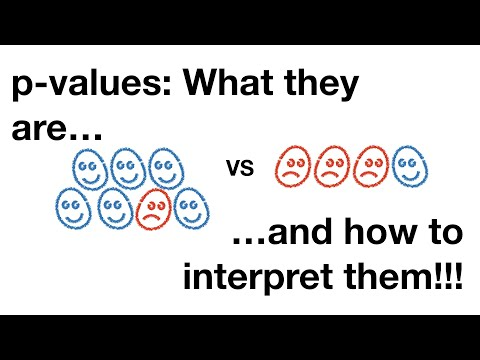

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("vemZtEM63GY",width=640,height=360)

&#9989;&nbsp; **Question 1** 

- In your own words describe what is the meaning of a p-value

<font size=+3>&#9998;</font> *Put your answer here.*


&#9989;&nbsp; **Question 2** 

- Following Prof. Cobb's (rhetorical) question: what does "p-value less than 0.05" actually mean? Is 0.05 truly that special?

<font size=+3>&#9998;</font> *Put your answer here.*


&#9989;&nbsp; **Question 3** 

Following StatQuest's example, say you are testing whether a new drug A has any adverse effects or not. You run extensive clinical trials. You make sure to take into account biological and social differences across patients. You make sure that all the patients take the right dose. You make sure that the experiment is as controlled as possible. 

Then you statistically test if the new drug is indeed safe. The associated p-value to this test is $0.04$. Hooray! $0.04 < 0.05$ so the drug can be safely distributed to patients.

- Do you agree with the last statement above?

<font size=+3>&#9998;</font> *Put your answer here.*


---

## 2. Pearson's correlation coefficient

Back in the in-class 10 (allometry) you may remember that we observed that log body mass and log bone circumference follow a nice linear pattern. This suggests that both measurements are *correlated*.

We are going to explore how to **quantify** these sort of correlations. There are many ways to measure correlation, but we are going to use the [**Pearson Correlation Coefficient**](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) (also referred to as "r", "rho",  "$\rho$", or "correlation coefficient"). The Pearson Correlation Coefficient ranges from $-1$ to $1$ and provides a measure of how **linearly** dependent on one another your variables are. 
- If the correlation coefficient is close to $1$ or $-1$, then the correlation is strong
- If it is close to zero, the correlation is weak.

Also:
- If the the correlation coefficient is negative, then the $y$ values decrease as $x$ increases.
- If the correlation coefficient is positive, then the $y$ values increase as $x$ increases.

For either of the two cases, we say that the relationship between $y$ and $x$ is **monotonic**.

See the image below for a visualization of this!
<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg" style="display:block; margin-left: auto; margin-right: auto; width: 80%" alt="Cartoon with correlation coefficient examples">
<p style="font-size:0.85em; text-align: center;">Credits: <a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient" target="_blank">Wikipedia</a></p>

**Watch the StatQuest on correlation.** Ignore the reference to the covariance video.

- You don't need to worry much about the actual formulas to compute Pearson's correlation (presented after the 13:55 mark): Python will do that for us.
- However, do watch his final point on correlation interpretation (starting after the 16:30 mark): we will explore $R^2$ in the next class.

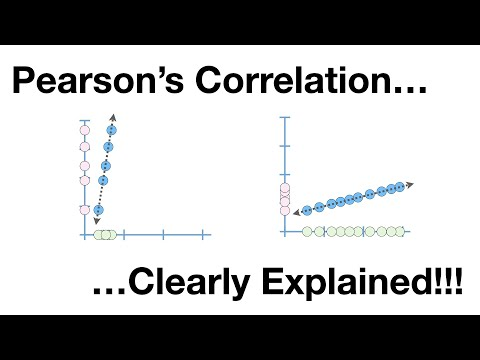

In [2]:
YouTubeVideo("xZ_z8KWkhXE",width=640,height=360)

&#9989;&nbsp; **Question 4** 

- How would you explain Pearson's correlation to a peer of yours that is not taking this course?

<font size=+3>&#9998;</font> *Put your answer here.*


&#9989;&nbsp; **Question 5** 

Say you are exploring the correlation in expression values between gene X and gene Y, and between gene X and gene Z.
- Between gene X and gene Y, you have a correlation value of 0.35 and a p-value of 0.01
- Between gene X and gene Z, you have a correlation value of 0.2 and a p-value of 0.000001

Which pair of genes is the more correlated? Explain your reasoning.

<font size=+3>&#9998;</font> *Put your answer here.*


---

<img src="https://statistikguru.de/wp-content/uploads/spearman_pearson05.svg" style="display:block; margin-left: auto; margin-right: auto; width: 25%" alt="Example of points that are correlated but not linearly correlated. Pearson coefficient is moderate but Spearman's is high.">
<p style="font-size:0.85em; text-align: center;">Credits: <a href="https://statistikguru.de/spss/spearman-korrelation/spearman-vs-pearson.html" target="_blank">StatistikGuru.de</a></p>

## 3. Spearman's correlation coefficient 

So far we have discussed a way to assess if two variables are correlated *linearly*. But not all correlations are linear. Check the example above: points are clearly correlated but they do not follow a line. Pearson's coeficcient will fail to fully account this correlation. Another example is allometry case from Day 10, we have a non-linear relationship between body mass and femur circumference:
$$\text{Body Mass} = a\times(\text{Femur circumference})^b.$$
Log-transforming the formula above makes it linear, so we can use Pearson's coefficient. 

But that's not always the case. Sometimes we simply cannot transform a non-linear relationship into a linear one. That's where Spearman's correlation comes into a play: a way to assess correlation even if the variables do not *necessarily* follow a line.

**Note:** If two variables follow a line closely, they will have *both* high Pearson and Spearman correlation coefficients. 

**Watch this video** (just the first two minutes) for a better description of Spearman. Like with StatQuest, **do not focus on the formulas**.

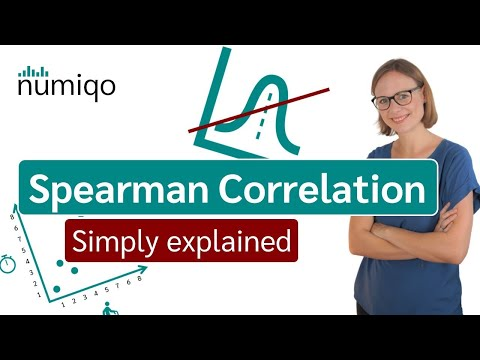

In [3]:
YouTubeVideo("XV_W1w4Nwoc",width=640, height=360, end=2*60+2)  

&#9989;&nbsp; **Question 6** 

- How does the Spearman coefficient differs from Pearson's? 

<font size=+3>&#9998;</font> *Put your answer here.*


&#9989;&nbsp; **Question 7** 

Say that you are assessing whether Gene X and Gene Y are correlated. You compute *both* Pearson and Spearman correlation coefficients. 

Fill in the table below describing what might be going on in each case. Assume that the p-values are small in every case. Don't overthink it and go with your best hunch if you are unsure.

<font size=+3>&#9998;</font> *Edit the table. The bars do NOT need to align*

|                                   | Pearson's Coefficient is low  | Pearson's Coefficient is high |
|----------------------------------:|------------------------------:|------------------------------:|
|**Spearman's Coefficient is low**  |   |  |
|**Spearman's Coefficient is high** |   |  |



&#9989;&nbsp; **Question 8** 

<img src="https://towardsdatascience.com/wp-content/uploads/2024/01/12fBtyQmLUps9dApMhoClig.png" style="display:block; margin-left: auto; margin-right: auto; width: 35%" alt="Table listing pros and cons of using Pearson vs Spearman correlation coefficient.">
<p style="font-size:0.85em; text-align: center;">Credits: <a href="https://towardsdatascience.com/pearson-vs-spearman-correlation-find-harmony-between-the-variables-08e201ca9f7f/" target="_blank">Riccardo Andreoni</a></p>

Take a look at the pros and cons table above.

- Describe one example where using Pearson would be preferable over Spearman.
- Describe another example where Spearman is preferred over Pearson. Can you think of a scenario where data is linearly correlated and yet Spearman would be preferred?

<font size=+3>&#9998;</font> *Put your answer here.*


---

## 4. Correlation is NOT causation

Before we end, it is important to emphasize that while causation implies correlation, the opposite is not necessarily true. 

<img src="https://nebigdatahub.org/wp-content/uploads/2023/11/6-Scatterplots-2-1280x720.jpg" style="display:block; margin-left: auto; margin-right: auto; width: 65%" alt="Examples of correlations associated to causation: weight vs height; distance vs time; ice cream sales vs temperature.">
<p style="font-size:0.85em; text-align: center;">Credits: <a href="https://nebigdatahub.org/nsdc-data-science-flashcards-data-visualizations-6-what-is-a-scatterplot/" target="_blank">North East Big Data Innovation Hub</a></p>

For example, we know that if we grow taller, that will *cause* an increase in weight. By driving a longer time we will *cause* a longer traveled distance. An increase in temperature will likely *cause* an increase in ice cream sales. And not surprisingly, we will find that each of those three pairs of variables are highly correlated.

But we can have highly correlated variables that despite their large coefficients, we know that it is nonsensical to attribute causation. This is known as spurious correlations. Like comparing the [popularity of memes vs number of electrical engineers](https://tylervigen.com/spurious/correlation/image/4854_popularity-of-the-dumb-ways-to-die-meme_correlates-with_the-number-of-electronics-engineers-in-utah.svg) ($r = 0.94$) or [number of people named Alix vs carjacks](https://tylervigen.com/spurious/correlation/image/5912_popularity-of-the-first-name-alix_correlates-with_carjackings-in-the-us.svg) ($r=0.97$). p-values are quite small in both cases.

In other words: correlation coefficients and p-values can only take us so far. Even more general: **data science can only take us so far; domain knowledge is crucial to make sense of the results.**


&#9989;&nbsp; **Task 9** 

Look for "spurious correlations" on the internet and list three that you find particularly funny/interesting. 

Remember that in markdown, you can embed an image from the internet by doing
```
![](<url of the image>)
```

*Example of embedded image*

![](https://tylervigen.com/spurious/correlation/image/4854_popularity-of-the-dumb-ways-to-die-meme_correlates-with_the-number-of-electronics-engineers-in-utah.svg)

---

### Additional reading (optional)

You can read more about spurious correlations in [an article from National Geographic a few years ago](https://www.nationalgeographic.com/science/article/nick-cage-movies-vs-drownings-and-more-strange-but-spurious-correlations). A PDF copy is attached in Canvas if you have trouble accessing the URL.

---

### Assignment wrap-up

Please fill out form from the link below. You must log-in using your MU credentials. **You must completely fill this out in order to receive credit for the assignment!** 

#### https://forms.office.com/r/37zmzq3PT8

In [ ]:
# Click on the link above if this cell fails to produce a survey form.

from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/37zmzq3PT8" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Click the link above if this cell fails to produce a survey
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Canvas web page.  Go to the "Pre-class assignments" folder, find the appropriate submission folder link, and upload it there.

See you in class!

&#169; Copyright 2026,  Division of Plant Science & Technology&mdash;University of Missouri